In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random

# Ejercicio 2

En este ejercicio realizaremos una modificación a la función isodata para calcular los centroides de forma aleatoria en función de cuantas clases se le aporten al metodo.
Esta nueva versión se valdrá de una nueva función auxiliar para calcular los centroides base.

In [2]:
# Función isodata
def isodata(img, C):
    
    v = np.zeros( (C, img.shape[2]) )
    
    v = comienzo(v)
       
    resimg = np.ones( (img.shape[0], img.shape[1]), dtype = int)
    
    res = True
    n = 0
    while res:
        
        resimg, lc = clasificacion(img,v,resimg)
        
        vp = v.copy()
        
        for i in range(len(lc)):
            if len(lc[i]) > 0:
                v[i] = reasignacion(lc[i])
                
        mod = True
        for j in range(v.shape[0]):
            for k in range(v.shape[1]):
                mod = mod and (vp[j][k] - v[j][k]) == 0
        
        if mod:
            res = False
            
        n += 1
    
    return resimg,n

# Función para generar los casos base de los centroides

def comienzo(v):
    
    for i in range(v.shape[0]):
        v[i,:] = (random.randint(0,255),
                  random.randint(0,255),
                  random.randint(0,255))
    
    return v

# Función para clasificar cada pixel

def clasificacion(img,centros,resimg):
    
    lc = list()
    for z in range(centros.shape[0]):
        lc.append(list())
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j][0] == 0 and img[i,j][1] == 0 and img[i,j][2] == 0:
                resimg[i,j] = 0
            else:
                dist = list()
                for v in centros:
                    d = np.sqrt((np.power((img[i][j][0]-v[0]),2))
                                 +(np.power((img[i][j][1]-v[1]),2))
                                 +(np.power((img[i][j][2]-v[2]),2)))
                    dist.append(d)

                c = dist.index(min(dist))
                
                lc[c].append((img[i,j][0],img[i,j][1],img[i,j][2]))
                resimg[i,j] = c+1
                
    return resimg, lc


# Función para reasignar valores a los centros de clasificación
def reasignacion(c):
    
    medC1 = 0
    medC2 = 0
    medC3 = 0
    
    for t in c:
        medC1 += t[0]
        medC2 += t[1]
        medC3 += t[2]
        
    medC = (medC1/len(c),medC2/len(c),medC3/len(c))
    
    return medC

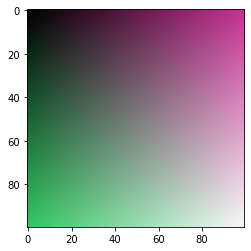

In [3]:
# Generador de degradado
tam = 100

b1 = np.zeros([tam,tam,1],dtype=np.uint8)
b2 = np.zeros([tam,tam,1],dtype=np.uint8)
b3 = np.zeros([tam,tam,1],dtype=np.uint8)

for i in range(b1.shape[0]):
    for j in range(b1.shape[0]):
        b1[i,j] = j*2+i*0.5
        b2[i,j] = j*0.5+i*2
        b3[i,j] = j*1.5+i*1
    
img = cv.merge((b1,b2,b3))
cv.imwrite("imagenes/degradado100.png",img)

plt.figure(1)
plt.imshow(img)
plt.show()

In [4]:
res,n = isodata(img,6)
print("Iteraciones hasta que los centroides se estabilizan:",n,"\n\n",res)

Iteraciones hasta que los centroides se estabilizan: 40 

 [[0 6 6 ... 5 5 5]
 [6 6 6 ... 5 5 5]
 [6 6 6 ... 5 5 5]
 ...
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]]


In [5]:
# Colorea con un seudocolor el resultado de la clasificación.
# Función seudo
def seudo(img):
    
    resimg = np.zeros((img.shape[0],img.shape[1],3),np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 0:
                resimg[i,j,:] = [255,0,0]
            elif img[i,j] == 1:
                resimg[i,j,:] = [0,255,0]
            elif img[i,j] == 2:
                resimg[i,j,:] = [0,0,255]
            elif img[i,j] == 3:
                resimg[i,j,:] = [255,255,0]
            elif img[i,j] == 4:
                resimg[i,j,:] = [0,255,255]
            elif img[i,j] == 5:
                resimg[i,j,:] = [255,0,255]
            else:
                resimg[i,j,:] = [0,0,0]
                
    return resimg

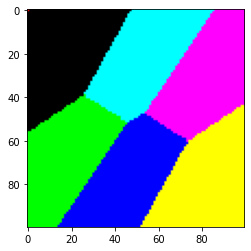

In [6]:
res_seudo = seudo(res)
cv.imwrite("soluciones/Ej2 - Isodata.png",
           cv.cvtColor(res_seudo, cv.COLOR_BGR2RGB))
plt.figure(2)
plt.imshow(res_seudo)
plt.show()